# import library

In [108]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import pickle

import os
import warnings
warnings.filterwarnings('ignore')

In [109]:
pre = '/Users/mialu/Documents/Course22Fall/TReNDS/MeshEvaluation/william-csv'

In [110]:
f = os.path.join(pre, 'df.pkl')

In [111]:
with open(f,'rb') as file:
    df = pickle.load(file)

In [112]:
pial_rm_list = ['cortexode-rm','corticalflow-rm','deepcsr-rm','freesurfer-rm','pialnn-rm','vox2cortex-rm','topofit-rm']
pial_list = ['cortexode','corticalflow','deepcsr','freesurfer','pialnn','vox2cortex','topofit']


df2 = df[df['model_name'].isin(pial_list)]
df3 = df[df['model_name'].isin(pial_rm_list)]

In [113]:
sns.set(rc={'figure.figsize':(13,4)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

In [114]:
df2.head(3)

,model_name,triangles,sergeyCollisions,surface,hostname,subject,f1,ratio_percent
0,cortexode,210500.0,69.0,white,arctrdagn005,289555.0,289555.white_converted.stl,0.032779
1,cortexode,202048.0,153.0,white,arctrdagn010,208428.0,208428.white_converted.stl,0.075725
2,cortexode,221444.0,87.0,white,arctrdagn009,205725.0,205725.white_converted.stl,0.039288


In [115]:
df2_pial = df2[df2['surface'] == 'pial']
df2_white = df2[df2['surface'] == 'white']

In [116]:
df3_pial = df3[df3['surface'] == 'pial']
df3_white = df3[df3['surface'] == 'white']

In [117]:
df2_pial['cut or no cut'] = ['Original'] * len(df2_pial)
df2_white['cut or no cut'] = ['Original'] * len(df2_white)
df2_pial = df2_pial[['ratio_percent','model_name','cut or no cut']]
df2_white = df2_white[['ratio_percent','model_name','cut or no cut']]

df3_pial['cut or no cut'] = ['Medial wall removed'] * df3_pial.shape[0]
df3_white['cut or no cut'] = ['Medial wall removed'] * df3_white.shape[0]
df3_pial = df3_pial[['model_name','ratio_percent','cut or no cut']]
df3_white = df3_white[['model_name','ratio_percent','cut or no cut']]

In [118]:
replace_dic={'cortexode':'CortexODE','corticalflow':'CorticalFlow','deepcsr':"DeepCSR",
            'vox2cortex':'Vox2Cortex','freesurfer':'*FreeSurfer','pialnn':'PialNN',
            'topofit':'Topofit','cortexode-rm':'CortexODE','corticalflow-rm':'CorticalFlow','deepcsr-rm':"DeepCSR",
            'vox2cortex-rm':'Vox2Cortex','freesurfer-rm':'*FreeSurfer','pialnn-rm':'PialNN',
            'topofit-rm':'Topofit'}

In [119]:
df2_pial = df2_pial.replace(replace_dic)
df2_white = df2_white.replace(replace_dic)
df3_pial = df3_pial.replace(replace_dic)
df3_white = df3_white.replace(replace_dic)

In [120]:
# reorganize pial data
merged_df = pd.concat([df2_pial, df3_pial], ignore_index=True)

custom_order = ['PialNN', 'Vox2Cortex', 'CortexODE','*FreeSurfer','CorticalFlow','DeepCSR']  # Example list with arbitrary order

df_pial = merged_df.sort_values(by=['model_name','cut or no cut'], key=lambda x: x.astype('category').cat.set_categories(custom_order), ascending=[True,False])

# reorganize white data

merged_df = pd.concat([df2_white, df3_white], ignore_index=True)
# Assuming 'df' is your DataFrame
custom_order = ['Vox2Cortex', 'CorticalFlow', 'CortexODE','Topofit','*FreeSurfer','DeepCSR']  # Example list with arbitrary order

df_white = merged_df.sort_values(by=['model_name','cut or no cut'], key=lambda x: pd.Categorical(x, categories=custom_order, ordered=True), ascending=[True, False])


In [131]:
pial_medians = []

models = ['PialNN', 'Vox2Cortex', 'CortexODE','*FreeSurfer','CorticalFlow','DeepCSR']
M = 'model_name'
P = 'ratio_percent'
for i in models:
    t = df_pial
    t = t[t[M]==i]
    t1 = np.median(t[t['cut or no cut']=='Original'][P])
    t2 = np.median(t[t['cut or no cut']=='Medial wall removed'][P])
#     print('original Median',t1 )
#     print('cut median',t2)
    pial_medians.append(t1)
    pial_medians.append(t2)

pial_medians = [round(i,2) for i in pial_medians]



white_medians = []

models = ['Vox2Cortex', 'CorticalFlow', 'CortexODE','Topofit','*FreeSurfer','DeepCSR']

for i in models:
    t = df_white
    t = t[t[M]==i]
    t1 = np.median(t[t['cut or no cut']=='Original'][P])
    t2 = np.median(t[t['cut or no cut']=='Medial wall removed'][P])
#     print('original Median',t1 )
#     print('cut median',t2)
    white_medians.append(t1)
    white_medians.append(t2)

white_medians = [round(i,2) for i in white_medians]

In [152]:
def plot2(tips, x = "model_name", y = "ratio_percent", hue = 'surface',name='Pial', maxy = 7, model='pial',round2=2,alpha=.6,color = sns.color_palette("Set2", 10)):
    sns.stripplot(x=x, y=y, hue=hue,
    data=tips, jitter=True,
    palette="Set2", split=True,linewidth=1,edgecolor='gray',alpha=alpha,hue_order=['Original','Medial wall removed'])

    # Get the ax object to use later.
    ax = sns.boxplot(x=x,y=y,hue=hue,
    data=tips,palette="Set2",fliersize=0,hue_order=['Original','Medial wall removed'])


    if model == 'pial':
        medians = pial_medians
    else:
        medians = white_medians
    
    vertical_offset = -.2

    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = ax.get_legend_handles_labels()
    
#     print(len(ax.get_xticks()))
#     print(len(medians))

    c1,c2 = color[0],color[1]
    
    if name=='Pial':

        for xtick in ax.get_xticks():
            if xtick < 2:
                idx = 2 * xtick
                ax.text(xtick - .54,medians[idx] + vertical_offset,medians[2 * xtick], 
                    horizontalalignment='center',size='x-small',color=c1,weight='semibold')

                idx = 2 * xtick + 1
                ax.text(xtick + .52,medians[idx] + vertical_offset,medians[2 * xtick + 1], 
                    horizontalalignment='center',size='x-small',color=c2,weight='semibold')
            else:
                idx = 2 * xtick
                ax.text(xtick-.2,-1.5,medians[2 * xtick], 
                    horizontalalignment='center',size='x-small',color=c1,weight='semibold')

                idx = 2 * xtick + 1
                ax.text(xtick + .2,-1.5,medians[2 * xtick + 1], 
                    horizontalalignment='center',size='x-small',color=c2,weight='semibold')               
                
            
    else:
        y_pos = -1
        for xtick in ax.get_xticks():
            idx = 2 * xtick
            ax.text(xtick - .2, y_pos, medians[2 * xtick],
                horizontalalignment='center',size='x-small',color=c1,weight='semibold')

            idx = 2 * xtick + 1
            ax.text(xtick + .2, y_pos,medians[2 * xtick + 1], 
                horizontalalignment='center',size='x-small',color=c2,weight='semibold')
                

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    if name=='Pial':
        l = plt.legend(handles[0:2], labels[0:2], loc='upper right', borderaxespad=0.,facecolor='white',edgecolor='white')
    else:
        legend = plt.legend()
        legend.remove()
     
    # plt.ylabel('Collision counts / Triangle counts (%)')
    plt.xlabel('')
    # plt.yscale('log')
    plt.ylabel('{} mesh\nself intersections (%)'.format(name))
    plt.xlim(-.7,5.5)
    plt.ylim(-2,maxy)
    plt.savefig('SelfCollisions-{}.png'.format(name), dpi=300)
    plt.savefig('SelfCollisions-{}.svg'.format(name), format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

In [153]:
t1 = df2[df2['model_name']=='vox2cortex']
np.median(t1[t1['surface']=='pial']['ratio_percent'])

2.038011139144095

In [154]:
t1 = df3[df3['model_name']=='vox2cortex-rm']

np.median(t1[t1['surface']=='pial']['ratio_percent'])

2.109548132851943

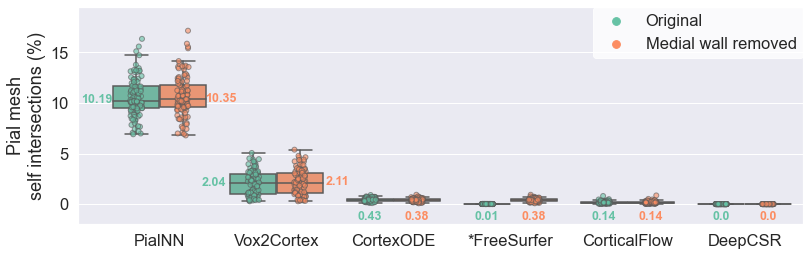

In [155]:
plot2(df_pial, M,P,"cut or no cut",'Pial',19.5,'pial')


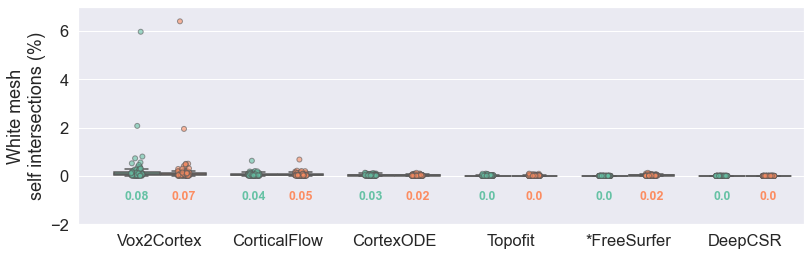

In [156]:
plot2(df_white, M,P,"cut or no cut",'White',7,'white')